# Homework (12 pts) - Probability Distributions of Random Variables

## Nisha Dalal nd8288

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

1. (3 pts) Assume that the rate of deleterious mutations on average is 1.2 per diploid genome. However, due to certain environmental factors, the mutation rate in a particular city is doubled. Plot the probabilities of having zero up to 10 mutations. If having eight or more mutations has a 50% chance of being lethal, how many deaths are expected out of 1000 residents of this city?

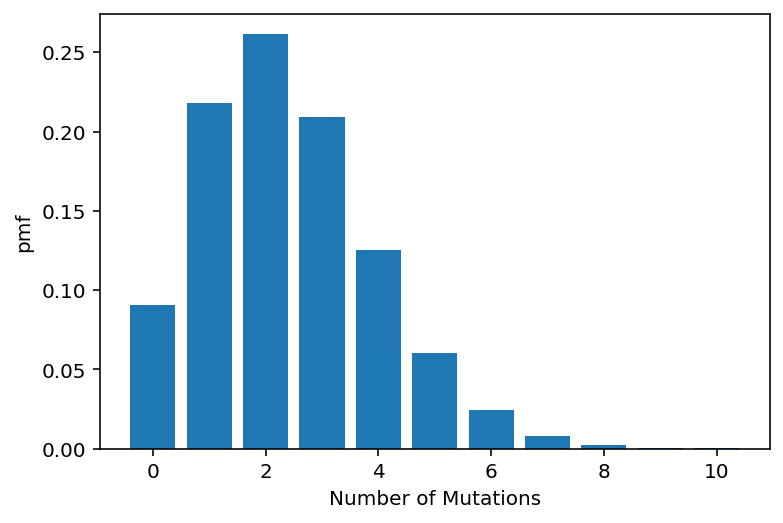

In [2]:
n_dist = st.poisson(2 * 1.2)

n_mutation = np.arange(11)

plt.bar(n_mutation, n_dist.pmf(n_mutation))
plt.ylabel('pmf')
plt.xlabel('Number of Mutations')
plt.show()

In [3]:
p_8 = 1 - n_dist.cdf(7) # probability of 8 or more
#print(p_8)

n_8 = p_8 * 1000 # num of individuals with 8 or more

n_dead = n_8 * 0.50 # num of expected deaths

print(f"{n_dead :.2f} expected deaths per 1000 individuals.")

1.67 expected deaths per 1000 individuals.


2. (3 pts) You are recording action potentials from a single neuron, and observe a spike on average once every 0.5 seconds. Plot the expected distribution of interspike intervals from zero up to the time for which 95% of all intervals are accounted for. If this neuron needs to fire two consecutive spikes within 0.1 seconds in order for a downstream neuron to spike, what is the average spike rate of the downstream neuron?

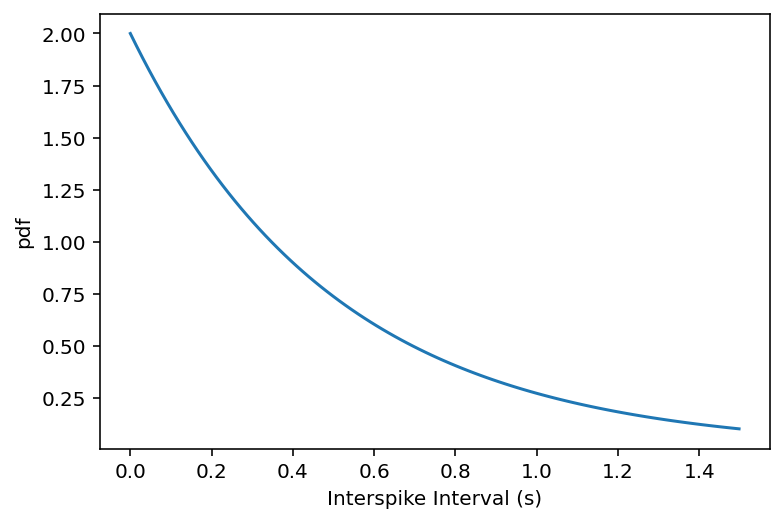

In [4]:
rate = 2  # per second

interval_dist = st.expon(loc=0, scale=1/rate)

interval_sec = np.linspace(0, interval_dist.ppf(0.95), 100)

plt.plot(interval_sec, interval_dist.pdf(interval_sec))
plt.ylabel('pdf')
plt.xlabel('Interspike Interval (s)')
plt.show()

In [5]:
# downstream rate = upstream rate * probability that upstream spike interval is less than 0.1 seconds

p_100 = interval_dist.cdf(0.1) # probablitiy interval < 100 ms

ds_rate = rate * p_100 # downstream rate

print(f"Average spike rate of downstream neuron is {ds_rate :.2f} per second.")

Average spike rate of downstream neuron is 0.36 per second.


3. (3 pts) A tetrameric protein composed of four identical subunits can bind an activating ligand, one ligand per subunit. At a given ligand concentration there is 30% chance that a binding site will be occupied by ligand. Plot the probability that 0, 1, 2, 3, or 4 ligands are bound.

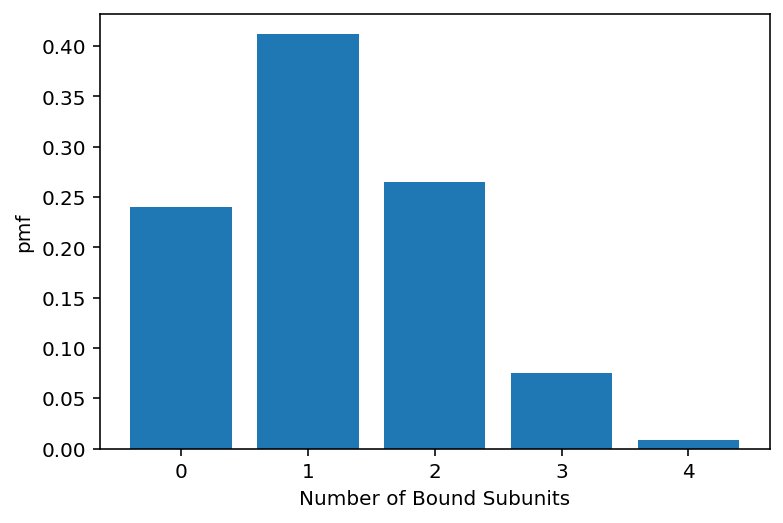

In [6]:
dist_bound = st.binom(4, 0.3)

n_bound = np.arange(5)

plt.bar(n_bound, dist_bound.pmf(n_bound))
plt.ylabel('pmf')
plt.xlabel('Number of Bound Subunits')
plt.show()

4. (3 pts) Mice are evaluated for depression following an experimental procedure using a set of tests that are summarized by a single score that is presumed to be correlated with their degree of depression. Scores for a group of mice had a mean value of 64 with a standard deviation of 12. Plot the distribution of scores. If a score above 80 is considered as being depressed, what is the probability that a mouse will be depressed following this experimental procedure?

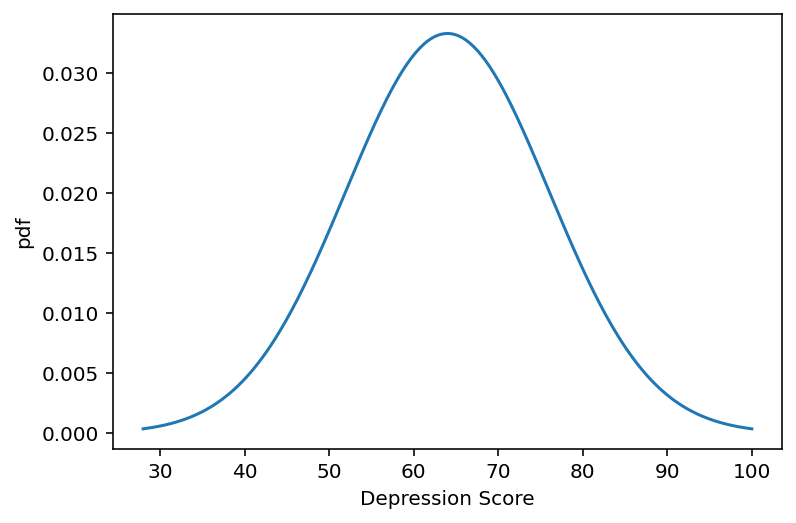

Probability of depressed = 0.09


In [7]:
dist = st.norm(64, 12)

scores = np.linspace((64-12*3), (64+12*3), 301)

# probability density of scores
pdf = dist.pdf(scores)

# plot
plt.plot(scores, pdf)
plt.ylabel('pdf')
plt.xlabel('Depression Score')
plt.show()

print(f"Probability of depressed = {dist.sf(80) :.2f}")